# Topics in Cloud and Environment (2019)

# Week 04: From Linear Regression to Generalized Linear Model
### multivariate regression and logistic regression
---
## Overview

In this short tutorial, I assume you already know some basic statistics as well as simple linear regression. After defining some symbols, we will directly jump into multivariate regreesion and generalized linear model.

---
## Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a *scalar response* (or *dependent variable*, denoted as $Y$) and one or more *explanatory variables* (or *independent variables*, denoted as $X = {x_1, x_2, ..., x_p}$). Mathematically, linear regression can be expressed as the following:

$Y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p + \epsilon = XB + \epsilon$

Given a data set 

$\{ y_{i}, x_{i1},\ldots ,x_{ip}\}_{i=1}^{n}$ 

of n observations, a linear regression model assumes that the relationship between the dependent variable y and the p-vector of regressors x is linear. This relationship is modeled through a disturbance term or error variable $\epsilon$ — an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and regressors.

(note: The case of one explanatory variable is called simple linear regression.)

Next, let's see some examples.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# For Chinese font
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="../data/NotoSansCJKtc-Regular.otf", size=10)
# Load data
data = pd.read_csv('../data/apts.csv')

### Dataset

In the previous sessions, we defined an indicator of air pollution as **the number of stations had recorded pm2.5 higher than 54.5ppm**. We created 10-day hourly time series for clustering, and finally decided to use 3 clusters to indicate 3 states of air-pollution:

- during event
- between events
- no event

Let's recall these results:

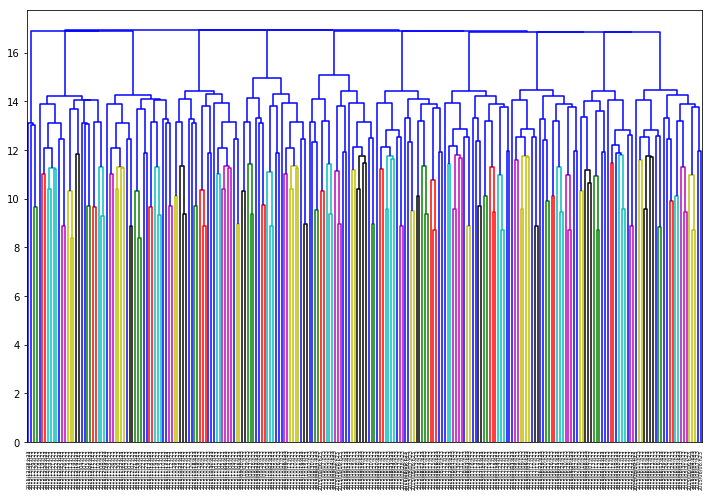

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage  

linked = linkage(data, 'single')

labelList = data.columns

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.tight_layout()
plt.show()

[0 0 0 0 0 0 1 0 0 0 2 2 2 2 0 0 0 2 2 2 2 0 0 0 0 1 0 0 0 2 2 2 2 0 0 0 0
 0 2 2 2 2 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 2 2 2 2 0 0 0 0 1 1 1 1 1]


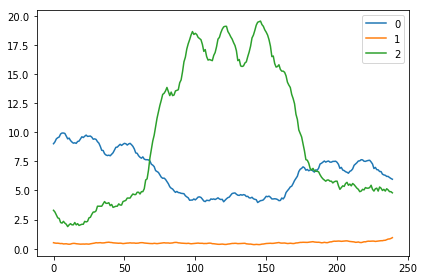

In [3]:
from sklearn.cluster import AgglomerativeClustering

ncluster = 3

hc = AgglomerativeClustering(n_clusters=ncluster, affinity='euclidean', linkage='ward')  
hc.fit_predict(data.T) 

print(hc.labels_)

for i in range(ncluster):
    plt.plot(data.iloc[:,hc.labels_==i].mean(axis=1),label=i)
plt.legend()
plt.tight_layout()
plt.show()

Since the cluster label is a categorical variable, we refine our definition of Y as 'this time series is during an air pollution event'. Hence y = 1 if its label is 0, and y = 0 otherwise.

Now we have our Y. In order to perform linear regression, we also need an independent variable, X. For simple linear regreesion, let's just sum up the total index of 240 hours into one measurement.

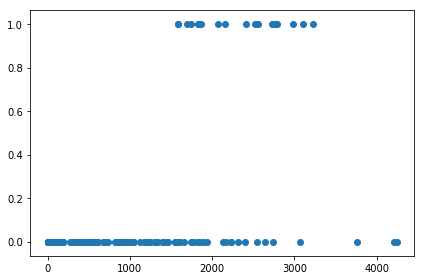

In [4]:
# Y = {1: hc.labels_==0, 0: otherwise}
Y = (hc.labels_==2)*1
Y = np.array(Y).reshape(len(Y),1)

# X = sum_p=1^240(x_p)
apts = pd.read_csv('../data/apts.csv')
X = apts.sum(axis=0)
X = np.array(X).reshape(X.shape[0],1)

# Let's see the data
plt.scatter(X,Y)
plt.tight_layout()
plt.show()

### Fit a linear model 

With the package `scikit-learn` installed, linear regression can be easily performed by [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). However, if you want to see more detailed statistics of the fitted model, [`statsmodels.api`](https://www.statsmodels.org/stable/index.html) can provide more human-readable results.

While a regression model gives continuous predictions, our target Y is actually binary (0 or 1). Hence, besides the general results, we also want to see whether we can predict Y correctly. We chose a threshold of 0.5 to assign our prediction as 0 or 1, and use [`pandas.crosstab`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) to show the results.

(array([[0.00015541]]), array([-0.02100294]))


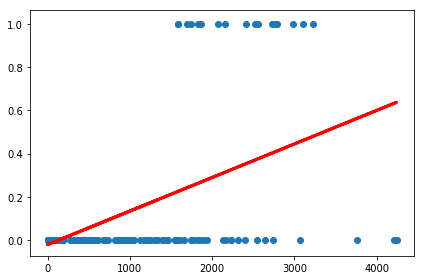

In [5]:
# Simple linear regression
from sklearn import linear_model
slreg = linear_model.LinearRegression()
slreg.fit(X=X, y=Y)

# Show the results
yhat = slreg.predict(X)
print((slreg.coef_, slreg.intercept_))

# Plot
plt.scatter(X,Y)
plt.plot(X,yhat, color='red', linewidth=3)
plt.tight_layout()
plt.show()

In [6]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     149.2
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           7.24e-29
Time:                        17:27:04   Log-Likelihood:                 79.716
No. Observations:                 355   AIC:                            -155.4
Df Residuals:                     353   BIC:                            -147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0210      0.012     -1.739      0.0

In [7]:
# Convert regression to classification
ct = pd.DataFrame({'y':Y.flatten(), 'yhat':(yhat.flatten()>=0.5)*1})
print(pd.crosstab(ct['y'], ct['yhat']))

yhat    0  1
y           
0     332  3
1      20  0


As shown above, though our linear model passed the statisitcal test of significance as *regression*, it failed to find any air-pollution case and hence performed badly if we see it as a *classification* problem.

Actually we give a wrong example here in purpose. In cases that Y is a binomial variable, [*logistic regression*](https://en.wikipedia.org/wiki/Logistic_regression) is a more appropriate common choice. 


## Logistic Regression

Logistic regression can be seen as a *generalized* form of linear regression. It still keeps the abstract form of $Y = XB + \epsilon$, but the target $Y$ is linked to $XB$ with a [*logit function*](https://en.wikipedia.org/wiki/Logit). The new form is:

$Y = \frac{exp(XB)}{1+exp(XB)} + \epsilon = \frac{1}{1+exp(-XB)} + \epsilon$

Since the logit function has sharp gradient in the middle and flat in the end, it is a suitable choice for mapping a continously distributed variable to a binary response. 

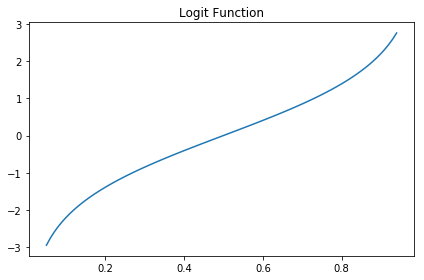

In [8]:
# Illustrate the logit function
def logit_function(x):
    return(np.log(x/(1-x)))
    
xs = np.arange(0.05,0.95,0.01)
plt.plot(xs, logit_function(xs))
plt.title('Logit Function')
plt.tight_layout()
plt.show()

Smilar to linear regression, the *logistic regression* can be easily done with [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) as well as [`statsmodels.api.Logit`](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html).

(array([[0.00187904]]), array([-5.04353527]))


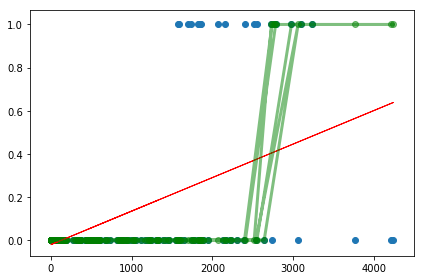

yhat    0  1
y           
0     330  5
1      13  7


In [9]:
from sklearn import linear_model
# Fit the classifier
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
logreg.fit(X, Y.flatten())

# Show the results
yhat_logit = logreg.predict(X)
print((logreg.coef_, logreg.intercept_))

# Plot
plt.scatter(X,Y)
plt.plot(X,yhat, color='red', linewidth=1)
plt.plot(X,yhat_logit, color='green', linewidth=3, alpha=0.5)
plt.scatter(X,yhat_logit, color='green', alpha=0.5)
plt.tight_layout()
plt.show()

# Show confusion matrix
ctl = pd.DataFrame({'y':Y.flatten(), 'yhat':yhat_logit.flatten()})
print(pd.crosstab(ctl['y'], ctl['yhat']))

In [10]:
logit = sm.Logit(Y,X2)
print(logit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.124303
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  355
Model:                          Logit   Df Residuals:                      353
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Apr 2019   Pseudo R-squ.:                  0.4266
Time:                        17:27:04   Log-Likelihood:                -44.128
converged:                       True   LL-Null:                       -76.953
                                        LLR p-value:                 5.381e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0435      0.596     -8.465      0.000      -6.211      -3.876
x1             0.0019      0.

As shown above, though the results are not yet perfect, at least some air-pollution cases are detected with this simple change.


## Generalized Linear Model

As demenstrated with previous examples, we can *generalized* the linear regression with a mapping function (called [*Link Function*](https://en.wikipedia.org/wiki/Generalized_linear_model#Link_function)) and make it more suitable for predicting Y while Y belongs to a particular statistical distribution. By introducing this flexibility, linear regression becomes *Generalized Linear Model (GLM)*, and allows for response variables that have error distribution models other than a normal distribution.

Besides using logit function for binomial variable, the following table summarizes some commonly seen link functions of GLM.

| Distribution | Typical uses | Link name | Link function |
|---|---|---|---|
| Normal | linear-response data | Identity | $X\beta = \mu$ |
| Exponential / Gamma | exponential-response data, scale parameters | Negative / inverse  | $X\beta = -\mu^{-1}$ |
| Poisson | count of occurrences in fixed amount of time/space | Log | $X\beta = ln(\mu)$ |
| Bernoulli | outcome of single yes/no occurrence | Logit | $X\beta = ln(\frac{\mu}{1-\mu})$ |

The logistic regression can also be extended to predict categorical and multinomial variables and serve as a multi-class classifier.

Though GLM might not always provide the most accurate predictions, it can tell us the importance and significance (statistically speaking) of each and every predictor. This is very important for most scientific studies, and hence GLM is still a very popular research tool nowadays.


## Mutivariate GLM

In the above examples, we use one single variable X to predict the outcome of Y. This is actually very rare in practice. As shown in the formula:

$Y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p + \epsilon = XB + \epsilon$

, the independent variable $X$ can be a vector of length *p*. Even in cases of *p* > 1, the GLM can be solved with exactly the same criteria: minimize the distance between the data and the link function (usually *least square error*, or $L2$).

Let's use the air-pollution indicator in the form of a time-series of 240-hour instead of its sum as X, and perform the logistic regression.

In [11]:
# Prepare data
Xts = apts.T
print('Dimension of X: '+ str(Xts.shape))
print('Dimension of Y: '+ str(Y.shape))
#
# Fit the classifier
mvreg = linear_model.LogisticRegression(C=1e6, solver='lbfgs', max_iter=500)
mvreg.fit(Xts, Y.flatten())

# Show the results
yhat_mv = mvreg.predict(Xts)
#print((mvreg.coef_, mvreg.intercept_))

# Show confusion matrix
ctl = pd.DataFrame({'y':Y.flatten(), 'yhat':yhat_mv.flatten()})
print('=== Confusion Matrix ===')
print(pd.crosstab(ctl['y'], ctl['yhat']))

Dimension of X: (355, 240)
Dimension of Y: (355, 1)
=== Confusion Matrix ===
yhat    0   1
y            
0     335   0
1       0  20


Great! With 240 variables, we obtained a model with 100% accuracy. This can be expected since the *during air pollution event* is one cluster of the 240 variables, and this results showed that the cluters can be linearly separated. However, this might not always be good. For example, when we have a perfect model, we also lose the power to evaluate the importance of each variables.

In [12]:
# 
mvlogit = sm.Logit(Y.flatten(), sm.add_constant(Xts))
mvlogit.fit(method='lbfgs', maxiter=500).summary()

/Users/tsyo/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)
/Users/tsyo/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/tsyo/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/tsyo/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/tsyo/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  355
Model:                          Logit   Df Residuals:                      126
Method:                           MLE   Df Model:                          228
Date:                Tue, 23 Apr 2019   Pseudo R-squ.:                   1.000
Time:                        17:27:04   Log-Likelihood:            -0.00056254
converged:                       True   LL-Null:                       -76.953
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.0849        nan        nan        nan         nan         nan
0             -0.3219        nan        nan        nan         nan         nan
1              0.6813        nan        nan        nan         nan         nan
2              0.8133        nan        nan        nan         nan         nan
3             -0.2449        nan        nan        nan         nan         nan
4              0.5806        nan        nan        nan         nan         nan
5             -0.8884        nan        nan        nan         nan         nan
6             -0.6362        nan        nan        nan         nan         nan
7             -0.0005        nan        nan        nan         nan         nan
8             -0.6385        nan        nan        nan         nan         nan
9             -0.7100        nan        nan        nan         nan         nan
10            -0.6392        nan        nan        nan         nan         nan
11             0.0790        nan        nan        nan         nan         nan
12            -0.3932        nan        nan        nan         nan         nan
13            -0.6625        nan        nan        nan         nan         nan
14            -0.6286        nan        nan        nan         nan         nan
15            -0.0303        nan        nan        nan         nan         nan
16             0.0068        nan        nan        nan         nan         nan
17             0.1220        nan        nan        nan         nan         nan
18            -0.4117        nan        nan        nan         nan         nan
19            -0.7369        nan        nan        nan         nan         nan
20            -0.5037        nan        nan        nan         nan         nan
21            -0.3821        nan        nan        nan         nan         nan
22             0.4069        nan        nan        nan         nan         nan
23             0.0547        nan        nan        nan         nan         nan
24             0.2831        nan        nan        nan         nan         nan
25             0.8131        nan        nan        nan         nan         nan
26             0.5136        nan        nan        nan         nan         nan
27             0.5466        nan        nan        nan         nan         nan
28             0.8299        nan        nan        nan         nan         nan
29            -0.0092        nan        nan        nan         nan         nan
30             0.0637        nan        nan        nan         nan         nan
31             0.9513        nan        nan        nan         nan         nan
32            -0.2531        nan        nan        nan         nan         nan
33            -0.6930        nan        nan        nan         nan         nan
34            -0.3470        nan        nan        nan         nan         nan
35             0.0104        nan        nan        nan         nan         nan
36             0.8122        nan        nan        nan         nan         nan
37

As shown above, a model without any error is hard to evaluate through statistical tests and hence bears the risk of *overfitting*. We will discuss this issue in the *model evaluation* sections.

Using the definition of $Y$ to predict $Y$ rarely happen in the real world, and hence we are going to use a more realistic dataset as the independent variable, $X$.


## Example: Weather Events vs. Air Pollution Events

Here we use the weather events to predict wheather there is an air pollution event. First we read in the weather events of 2015 and sum up the event every 10 days, so that we have the same time-span for weather events and air-pollution index.

In [13]:
# Read weather events
events = pd.read_csv('../data/all_events_2015.csv')
#print(events.head())
# Sum up events every 10 days
evsum = []
for i in np.arange(10, events.shape[0]):
    tmp = events.iloc[(i-10):i,1:].sum(axis=0)
    evsum.append(tmp)
# Add date
evsum = pd.DataFrame(evsum)
evsum.index = list(events['yyyymmdd'])[10:]
evsum.index = evsum.index.map(str)
# Check
print(evsum.shape)
evsum.head()

(355, 13)


,CS,FT,NE,SNE,SWF,SSWF,TYW,TC100,TC200,TC300,TC500,TC1000,NWPTY
20150111,0,1,6,3,0,0,0,0,0,0,0,0,1
20150112,0,1,5,2,0,0,0,0,0,0,0,0,0
20150113,0,1,4,2,0,0,0,0,0,0,0,0,1
20150114,0,1,4,2,0,0,0,0,0,0,0,0,2
20150115,0,2,4,2,0,0,0,0,0,0,0,0,3


In [14]:
apdates = [d.replace('/','')[:8] for d in list(labelList)]
apevents = pd.DataFrame({'ap':Y.flatten()}, index=apdates)
print(apevents.shape)
apevents.head()

(355, 1)


,ap
20150111,0
20150112,0
20150113,0
20150114,0
20150115,0


In [15]:
from sklearn import linear_model
# Fit the classifier
glm = linear_model.LogisticRegression(C=1e5, solver='lbfgs', max_iter=500)
glm.fit(evsum, apevents['ap'])

# Show the results
yhat_glm = glm.predict(evsum)
print((glm.coef_, glm.intercept_))

# Show confusion matrix
ctl = pd.DataFrame({'y':apevents['ap'], 'yhat':yhat_glm.flatten()})
print(pd.crosstab(ctl['y'], ctl['yhat']))

#
from sklearn.metrics import accuracy_score, classification_report
cr = classification_report(ctl['y'], ctl['yhat'])
print(cr)

(array([[  2.91274534,  -0.87236863,   0.24163378,  -0.11044387,
         -9.65065329,  -0.22853688,  -1.68703682,  -0.60301804,
         -1.07877948,  -3.32523704, -10.15865434,   1.18991132,
         -0.13289312]]), array([-3.08207973]))
yhat    0   1
y            
0     329   6
1      10  10
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       335
           1       0.62      0.50      0.56        20

   micro avg       0.95      0.95      0.95       355
   macro avg       0.80      0.74      0.77       355
weighted avg       0.95      0.95      0.95       355



As shown above, using cumulative weather events as predictors gives an intermediate result. Though the overall accuracy is high (97%), the natural occurrence of the air-pollution events is only 5.6%, so looking at the precision / recall of the air pollution event is more informative. (Note: the report is generated with [`sklearn.metrics.classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html))

So, how about the contribution of each weather event?

In [16]:
# Using statsmodels.api for GLM
glmsm = sm.Logit(apevents['ap'], sm.add_constant(evsum))
glmsm.fit(maxiter=30).summary()

         Current function value: 0.113694
         Iterations: 30


/Users/tsyo/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)
/Users/tsyo/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     ap   No. Observations:                  355
Model:                          Logit   Df Residuals:                      341
Method:                           MLE   Df Model:                           13
Date:                Tue, 23 Apr 2019   Pseudo R-squ.:                  0.4755
Time:                        17:27:05   Log-Likelihood:                -40.362
converged:                      False   LL-Null:                       -76.953
                                        LLR p-value:                 2.071e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0821      1.336     -2.306      0.021      -5.701      -0.463
CS             2.9129      1.025      2.842      0.004       0.904       4.922
FT            -0.8723      0.375     -2.326      0.020      -1.607      -0.137
NE             0.2417      0.295      0.818      0.413      -0.337       0.820
SNE           -0.1105      0.270     -0.410      0.682      -0.639       0.418
SWF          -30.5380   7.34e+05  -4.16e-05      1.000   -1.44e+06    1.44e+06
SSWF          28.6786   7.34e+05   3.91e-05      1.000   -1.44e+06    1.44e+06
TYW           31.2345    2.2e+05      0.000      1.000   -4.32e+05    4.32e+05
TC100        -36.1571   7.66e+05  -4.72e-05      1.000    -1.5e+06     1.5e+06
TC200         20.4632   7.34e+05   2.79e-05      1.000   -1.44e+06    1.44e+06
TC300        -12.2273   5907.236     -0.002      0.998   -1.16e+04    1.16e+04
TC500        -25.7044    2.2e+05     -0.000      1.000   -4.32e+05    4.32e+05
TC1000         1.1899      0.328      3.632      0.000       0.548       1.832
NWPTY         -0.1329      0.125     -1.061      0.289      -0.378       0.113
==============================================================================

Possibly complete quasi-separation: A fraction 0.51 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Well, the numerical solver doesn't converge. And if we increase the number of iteration allowed, the solver will yield an error of *singular matrix*. This is a common error when your $X$ matrix contains too many zeros, so that we have a few identical data rows of all zeros.

In [17]:
df = apevents.merge(evsum, left_index=True, right_index=True, how='left')
print('The Annual Stats of 2015')
print(df.loc[df['ap']==0,:].describe())
print()
print('The Stats of Air-Pollution days in 2015')
print(df.loc[df['ap']==1,:].describe())

The Annual Stats of 2015
          ap          CS          FT          NE         SNE         SWF  \
count  335.0  335.000000  335.000000  335.000000  335.000000  335.000000   
mean     0.0    0.014925    1.641791    3.325373    1.820896    3.373134   
std      0.0    0.121436    1.660581    2.927024    2.136967    4.139903   
min      0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.0    0.000000    1.000000    3.000000    1.000000    0.000000   
75%      0.0    0.000000    2.000000    6.000000    3.000000    8.000000   
max      0.0    1.000000    9.000000   10.000000    9.000000   10.000000   

             SSWF         TYW       TC100       TC200       TC300       TC500  \
count  335.000000  335.000000  335.000000  335.000000  335.000000  335.000000   
mean     1.880597    0.597015    0.089552    0.238806    0.388060    0.776119   
std      3.093950    1.356507    0.368333    0.

In the cell above, we merged the X and Y with dates and derived some simple statistics. We can see that for air-pollutted cases (Y=1) in 2015, there is no SWF, SSWF, TYW, and TCXXX events, and this is the cause of non-convergence in calculation.

So, let's adjust our GLM and try again.

In [18]:
import statsmodels.formula.api as smf

formula = 'ap ~ CS + FT + NE + SNE + TC1000 + NWPTY'

glmsmf = smf.glm(formula=formula, data = df, family = sm.families.Binomial())
glmsmf_fit = glmsmf.fit()
print(glmsmf_fit.summary())

# Show the results
yhat_smf = (glmsmf_fit.mu>=0.5)*1

# Show confusion matrix
ctl = pd.DataFrame({'y':df['ap'], 'yhat':yhat_smf.flatten()})
print(pd.crosstab(ctl['y'], ctl['yhat']))

#
from sklearn.metrics import accuracy_score, classification_report
cr = classification_report(ctl['y'], ctl['yhat'])
print(cr)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     ap   No. Observations:                  355
Model:                            GLM   Df Residuals:                      348
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55.415
Date:                Tue, 23 Apr 2019   Deviance:                       110.83
Time:                        17:27:05   Pearson chi2:                     260.
No. Iterations:                     7   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0693      0.910     -4.471      0.000      -5.853      -2.285
CS             2.9102      0.921      3.160      0.0

Now we get a working model by removing un-informative variables, though the model doesn't do very well in general.

We can try other independent variables to predict the air-pollution events, and in most cases we will need *dimension reduction* techniques, which we will cover in laster sessions.

---
### Reference
- [GLM on wiki](https://en.wikipedia.org/wiki/Generalized_linear_model)
- [GLM on scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html)
- [GLM on TowardDS](https://towardsdatascience.com/generalized-linear-models-8738ae0fb97d)
-  Nelder, John; Wedderburn, Robert (1972). "Generalized Linear Models". Journal of the Royal Statistical Society. Series A (General). Blackwell Publishing. 135 (3): 370–384. doi:10.2307/2344614. JSTOR 2344614
